## **Installing Packages**

In [1]:
# Install sklearn
!pip install scikit-learn==1.5.2

# Install TabPFN
!pip install tabpfn

# TabPFN Community installs optional functionalities around the TabPFN model
# These include post-hoc ensembles, interpretability tools, and more
!git clone https://github.com/PriorLabs/tabpfn-extensions
!pip install -e tabpfn-extensions[all]

# Install Baselines
!pip install catboost xgboost

# Install example datasets
!pip install datasets

fatal: destination path 'tabpfn-extensions' already exists and is not an empty directory.
Obtaining file:///content/tabpfn-extensions
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for tabpfn-extensions (pyproject.toml) ... done
  Created wheel for tabpfn-extensions: filename=tabpfn_extensions-0.1.0-0.editable-py3-none-any.whl size=11662 sha256=a02a0ba0b5abe47bdb40fe9741e13ca557a12f632c8f27ee0960cf99f4b7369c
  Stored in directory: /tmp/pip-ephem-wheel-cache-iirxswum/wheels/8f/b7/2c/ec18b502697068b39e1503426a50b729bdac046bed4810759d
Successfully built tabpfn-extensions
  Attempting uninstall: tabpfn-extensions
    Found existing installation: tabpfn-extensions 0.1.0
    Uninstalling tabpfn-extensions-0.1.0:
      Successfully uninstalled tabpfn-extensions-0.1.0


In [2]:
!pip install "tabpfn-extensions[all] @ git+https://github.com/PriorLabs/tabpfn-extensions.git"

  Cloning https://github.com/PriorLabs/tabpfn-extensions.git to /tmp/pip-install-p3qz0dt4/tabpfn-extensions_76c3b5c0460f4bbc8470165d48a012ae
  Running command git clone --filter=blob:none --quiet https://github.com/PriorLabs/tabpfn-extensions.git /tmp/pip-install-p3qz0dt4/tabpfn-extensions_76c3b5c0460f4bbc8470165d48a012ae
  Resolved https://github.com/PriorLabs/tabpfn-extensions.git to commit abdf4f1bace032d9355fa614fc39a2457262a163
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tabpfn-extensions: filename=tabpfn_extensions-0.1.0-py3-none-any.whl size=112504 sha256=b923fbf5e9f510b695768e9eb79ed0b1d35356cb431d73223aa63d8ad0aecd0d
  Stored in directory: /tmp/pip-ephem-wheel-cache-93yyt7x9/wheels/2f/10/b7/7d2980755fdab6199310edf0cbe6c4f4c5ad058b228aef552d
Successfully built tabpfn-extensions
  Attempting uninstall: tabpfn-extensions
    Found existing installation: tabpfn-extensions

## Necessary Imports for the Notebook

In [3]:
import os

# Setup Imports
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    r2_score,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, Latex

# Baseline Imports
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from catboost import CatBoostClassifier, CatBoostRegressor

import torch

from tabpfn import TabPFNClassifier, TabPFNRegressor
from tabpfn_extensions.post_hoc_ensembles.sklearn_interface import AutoTabPFNClassifier, AutoTabPFNRegressor

if not torch.cuda.is_available():
    raise SystemError('GPU device not found. For fast training, please enable GPU. See section above for instructions.')

## **Predicting with TabPFN**

### Classification

In [10]:
# Parkinson's Disease dataset: Predict Parkinson's disease presence
# Features: Voice measurements (e.g., frequency, amplitude)
# Samples: 195 cases
#df = fetch_openml('parkinsons')

# Alternative datasets (commented for reference):

# German Credit Fraud (ID: 31)
# Samples: 1,000
# Features: 20 (account info, credit history, employment)
# Target: Good/Bad credit risk
# df = fetch_openml(data_id=31)

# Cholesterol dataset: Predict cholesterol levels
# Features: Patient characteristics, medical measurements
# Samples: 303 patients
# Target: Cholesterol levels in mg/dl
# df = fetch_openml('cholesterol', version=2, as_frame=True)

# Primary Tumor dataset: Predict tumor type and size
# Features: Patient symptoms, medical test results
# Samples: 339 patients
# Target: Tumor classification and size
# df = fetch_openml('primary-tumor', version=1, as_frame=True) - too many classes!

# Heart Disease dataset (Statlog): Predict presence of heart disease
# Features: Clinical and test measurements
# Samples: 270 patients
# Target: Binary heart disease diagnosis
# df = fetch_openml("heart-statlog", version=1)

# Diabetes dataset: Predict diabetes presence
# Features: Medical measurements, patient history
# Samples: 768 patients
# Target: Binary diabetes diagnosis
df = fetch_openml("diabetes", version=1)

# Hypothyroid dataset: Predict thyroid condition
# Features: Blood test results, patient symptoms
# Samples: 3772 patients
# Target: Thyroid condition classification
# df = fetch_openml('hypothyroid')
# dataset = fetch_openml(data_id=42532, as_frame=True, parser='auto')

X, y = df.data, df.target

# Encode target labels to classes
le = LabelEncoder()
y = le.fit_transform(y)

# Convert all categorical columns to numeric
for col in X.select_dtypes(['category']).columns:
    X[col] = X[col].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
display(Markdown(df['DESCR']))

display(X)

**Author**: [Vincent Sigillito](vgs@aplcen.apl.jhu.edu)  

**Source**: [Obtained from UCI](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) 

**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

1. Title: Pima Indians Diabetes Database
 
 2. Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
 
 3. Past Usage:
     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., &
        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
        the onset of diabetes mellitus.  In {it Proceedings of the Symposium
        on Computer Applications and Medical Care} (pp. 261--265).  IEEE
        Computer Society Press.
 
        The diagnostic, binary-valued variable investigated is whether the
        patient shows signs of diabetes according to World Health Organization
        criteria (i.e., if the 2 hour post-load plasma glucose was at least 
        200 mg/dl at any survey  examination or if found during routine medical
        care).   The population lives near Phoenix, Arizona, USA.
 
        Results: Their ADAP algorithm makes a real-valued prediction between
        0 and 1.  This was transformed into a binary decision using a cutoff of 
        0.448.  Using 576 training instances, the sensitivity and specificity
        of their algorithm was 76% on the remaining 192 instances.
 
 4. Relevant Information:
       Several constraints were placed on the selection of these instances from
       a larger database.  In particular, all patients here are females at
       least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
       routine that generates and executes digital analogs of perceptron-like
       devices.  It is a unique algorithm; see the paper for details.
 
 5. Number of Instances: 768
 
 6. Number of Attributes: 8 plus class 
 
 7. For Each Attribute: (all numeric-valued)
    1. Number of times pregnant
    2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    3. Diastolic blood pressure (mm Hg)
    4. Triceps skin fold thickness (mm)
    5. 2-Hour serum insulin (mu U/ml)
    6. Body mass index (weight in kg/(height in m)^2)
    7. Diabetes pedigree function
    8. Age (years)
    9. Class variable (0 or 1)
 
 8. Missing Attribute Values: None
 
 9. Class Distribution: (class value 1 is interpreted as "tested positive for
    diabetes")
 
    Class Value  Number of instances
    0            500
    1            268
 
 10. Brief statistical analysis:
 
     Attribute number:    Mean:   Standard Deviation:
     1.                     3.8     3.4
     2.                   120.9    32.0
     3.                    69.1    19.4
     4.                    20.5    16.0
     5.                    79.8   115.2
     6.                    32.0     7.9
     7.                     0.5     0.3
     8.                    33.2    11.8
 
 




 Relabeled values in attribute 'class'
    From: 0                       To: tested_negative     
    From: 1                       To: tested_positive

Downloaded from openml.org.

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Train and evaluate TabPFN
y_pred = TabPFNClassifier(random_state=42).fit(X_train, y_train).predict_proba(X_test)

# Calculate ROC AUC (handles both binary and multiclass)
score = roc_auc_score(y_test, y_pred if len(np.unique(y)) > 2 else y_pred[:, 1])
print(f"TabPFN ROC AUC: {score:.4f}")

/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:89: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-classifier.ckpt.
  model, _, config_ = load_model_criterion_config(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tabpfn-v2-classifier.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

TabPFN ROC AUC: 0.8531


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

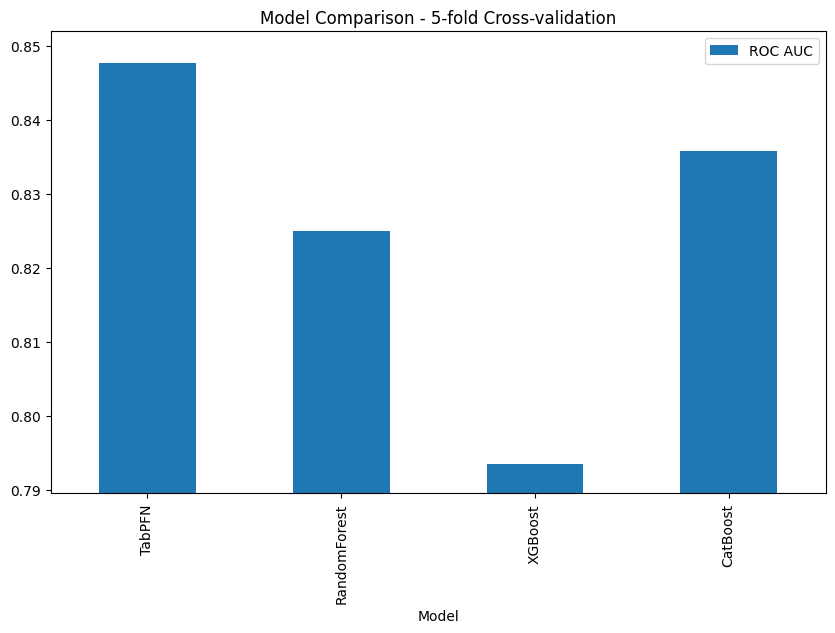

In [12]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.995, min(1.0, df['ROC AUC'].max() * 1.005))
ax.set_title('Model Comparison - 5-fold Cross-validation')

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s finished
/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:89: UserWarning: Downloading model to /usr/local/lib/python3.11/dist-packages/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-od3j1g5m.ckpt.
  model, _, config_ = load_model_criterion_config(


tabpfn-v2-classifier-od3j1g5m.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:89: UserWarning: Downloading model to /usr/local/lib/python3.11/dist-packages/tabpfn_extensions/hpo/hpo_models/tabpfn-v2-classifier-llderlii.ckpt.
  model, _, config_ = load_model_criterion_config(


tabpfn-v2-classifier-llderlii.ckpt:   0%|          | 0.00/29.0M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

INFO:tabpfn_extensions.post_hoc_ensembles.greedy_weighted_ensemble:Order of selections: [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]
INFO:tabpfn_extensions.post_hoc_ensembles.greedy_weighted_ensemble:Val loss over iterations: [np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.8520801232665639), np.float64(-0.852080123266564), np.float64(-0.852080123266564), np.float64(-0.8523882896764252),

Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation')

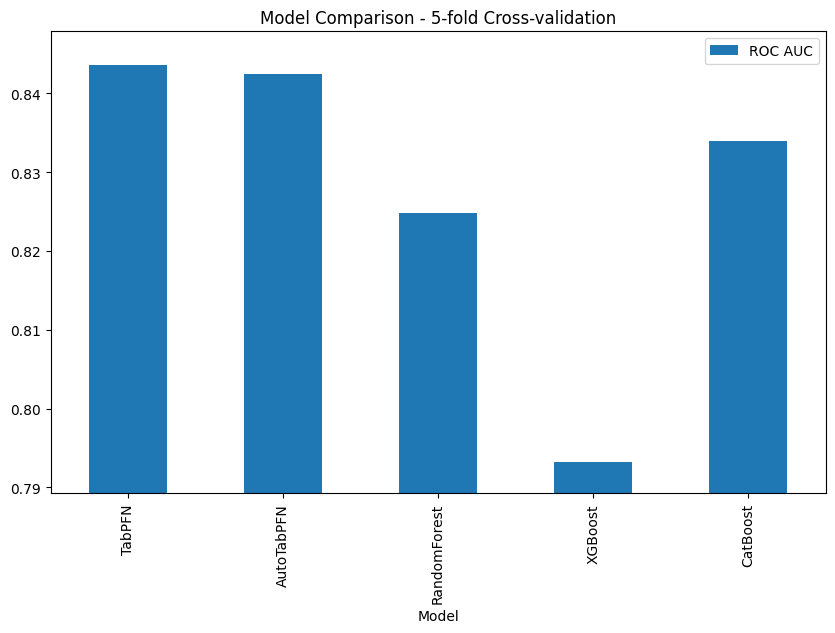

In [13]:
# Adding AutoTabPFN which is significantly slower but gives best results

# Define models
models = [
    ('TabPFN', TabPFNClassifier(random_state=42)),
    ('AutoTabPFN', AutoTabPFNClassifier(max_time=30, device="cuda")), # takes 30 seconds to run so excluded previously
    ('RandomForest', RandomForestClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'roc_auc_ovr' if len(np.unique(y)) > 2 else 'roc_auc'
scores = {name: cross_val_score(model, X, y, cv=3, scoring=scoring, n_jobs=1, verbose=1).mean()
          for name, model in models}

# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'ROC AUC'])
ax = df.plot(x='Model', y='ROC AUC', kind='bar', figsize=(10, 6))
ax.set_ylim(df['ROC AUC'].min() * 0.995, min(1.0, df['ROC AUC'].max() * 1.005))
ax.set_title('Model Comparison - 5-fold Cross-validation')

### **Regression**

In [14]:
# Boston Housing dataset
# Regression task: Predict house prices
# Features: Neighborhood characteristics, housing attributes
# Samples: 506 neighborhoods
# Target: Median house value in $1000s
df = fetch_openml(data_id=531, as_frame=True)

# Alternative datasets (commented for reference):

# Liver Disorders dataset
# Classification task: Predict liver disorder presence
# Features: Blood test results, alcohol consumption
# Samples: 345 patients
# Target: Binary liver disorder diagnosis
# df = fetch_openml("liver-disorders", version=1)

# Grid Stability dataset
# Regression task: Predict electrical grid stability
# Features: Power system measurements, grid parameters
# Samples: 10,000 simulations
# Target: Grid stability score
#df = fetch_openml(data_id=44973, as_frame=True)

# Concrete Compressive Strength dataset
# Regression task: Predict concrete strength
# Features: Concrete components (cement, water, aggregates)
# Samples: 1,030 concrete samples
# Target: Compressive strength in MPa
#df = fetch_openml(data_id=44959, as_frame=True)

X, y = df.data, df.target

# Convert all 'object' and 'category' columns to numeric
for col in X.select_dtypes(['object', 'category']).columns:
    X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Print dataset description
display(Markdown(df['DESCR']))

display(X)

<ipython-input-14-7ea6a9e5e0fa>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = pd.factorize(X[col])[0]  # Factorize encodes as integers


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10,000
PTRATIO  pupil-teacher ratio by town
B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT    % lower status of the population
MEDV     Median value of owner-occupied homes in $1000's


Information about the dataset
CLASSTYPE: numeric
CLASSINDEX: last

Downloaded from openml.org.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,1,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,1,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,2,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,2,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,0,273.0,21.0,393.45,6.48


In [15]:
# Train and evaluate TabPFN
reg = TabPFNRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Calculate Variance Explained (R2 Score)
score = root_mean_squared_error(y_test, y_pred)
print(f"TabPFN RMSE: {score:.4f}")

/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:101: UserWarning: Downloading model to /root/.cache/tabpfn/tabpfn-v2-regressor.ckpt.
  model, bardist, config_ = load_model_criterion_config(


tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

TabPFN RMSE: 2.5766


Text(0.5, 1.0, 'Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

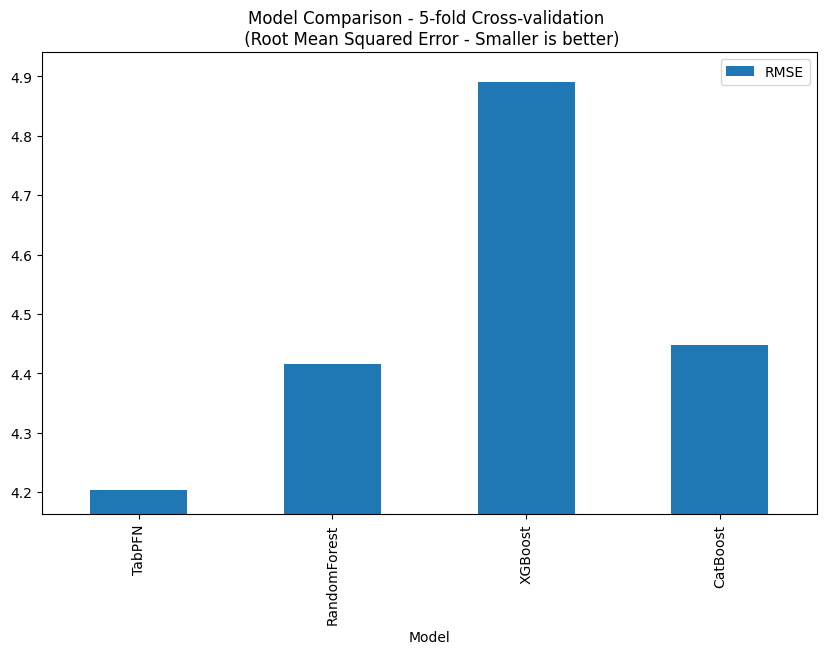

In [16]:
# Compare different machine learning models by training each one multiple times
# on different parts of the data and averaging their performance scores for a
# more reliable performance estimate

# Define models
models = [
    ('TabPFN', TabPFNRegressor(random_state=42)),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring = 'neg_root_mean_squared_error'
scores = {name: cross_val_score(model, X, y, cv=5, scoring=scoring, n_jobs=-1).mean()
          for name, model in models}


# Plot results
df = pd.DataFrame(list(scores.items()), columns=['Model', 'RMSE'])
df.RMSE = -df.RMSE # Smaller is better
ax = df.plot(x='Model', y='RMSE', kind='bar', figsize=(10, 6))
ax.set_ylim(df['RMSE'].min() * 0.99, df['RMSE'].max() * 1.01)
ax.set_title('Model Comparison - 5-fold Cross-validation \n (Root Mean Squared Error - Smaller is better)')

### **Data Generation / Outlier Detection**

100%|██████████| 3/3 [00:08<00:00,  2.92s/it]


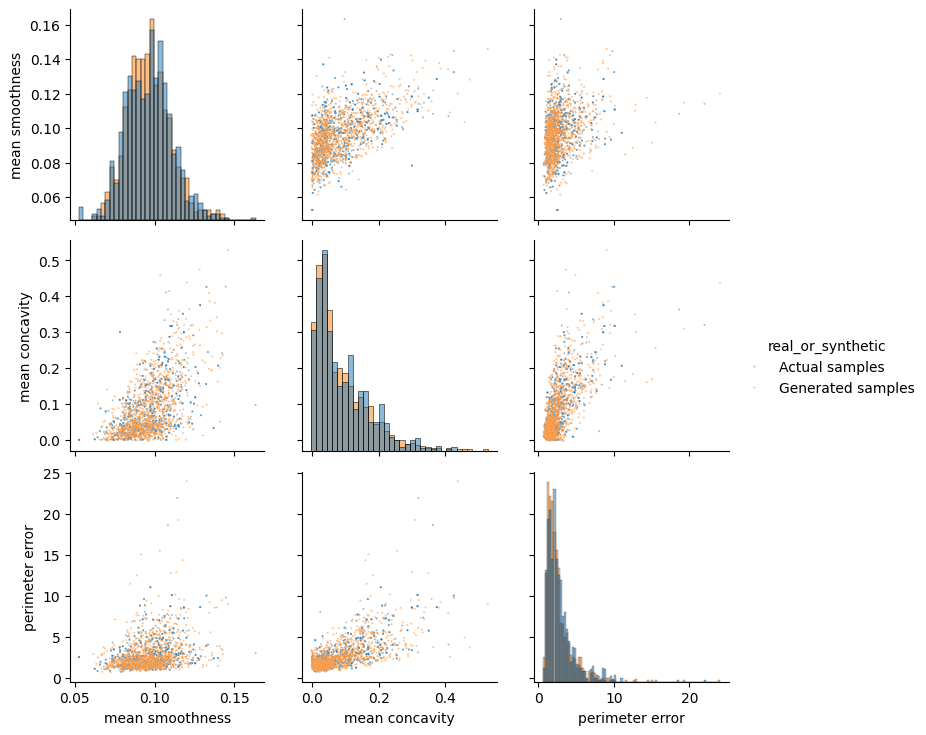

In [17]:
from tabpfn_extensions import unsupervised

# Load and prepare breast cancer dataset
df = load_breast_cancer(return_X_y=False)
X, y = df['data'], df['target']
feature_names = df['feature_names']

# Initialize TabPFN models
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=TabPFNClassifier(),
    tabpfn_reg=TabPFNRegressor()
)

# Select features for synthetic data generation
# Example features: [mean texture, mean area, mean concavity]
feature_indices = [4, 6, 12]

# Run synthetic data generation experiment
experiment = unsupervised.experiments.GenerateSyntheticDataExperiment(
    task_type='unsupervised'
)

results = experiment.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=feature_names,
    temp=1.0,  # Temperature parameter for sampling
    n_samples=X.shape[0] * 2,  # Generate twice as many samples as original data
    indices=feature_indices
)

### **Outlier Detection**

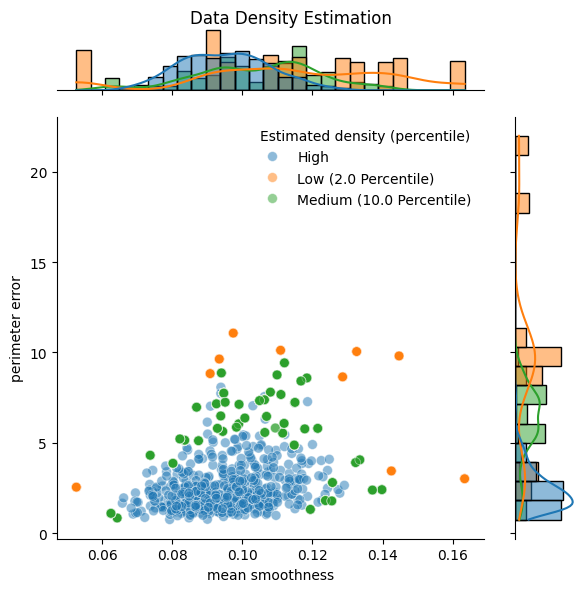

In [18]:
import torch
from sklearn.datasets import load_breast_cancer
from tabpfn_extensions import unsupervised
from tabpfn_extensions import TabPFNClassifier, TabPFNRegressor

# Load data
df = load_breast_cancer(return_X_y=False)
X, y = df["data"], df["target"]
attribute_names = df["feature_names"]

# Initialize models
clf = TabPFNClassifier(n_estimators=4)
reg = TabPFNRegressor(n_estimators=4)
model_unsupervised = unsupervised.TabPFNUnsupervisedModel(
    tabpfn_clf=clf, tabpfn_reg=reg
)

# Run outlier detection
exp_outlier = unsupervised.experiments.OutlierDetectionUnsupervisedExperiment(
    task_type="unsupervised"
)
results = exp_outlier.run(
    tabpfn=model_unsupervised,
    X=torch.tensor(X),
    y=torch.tensor(y),
    attribute_names=attribute_names,
    indices=[4, 12],  # Analyze features 4 and 12
)

### **Interpretability**

PermutationExplainer explainer: 51it [01:47,  2.23s/it]


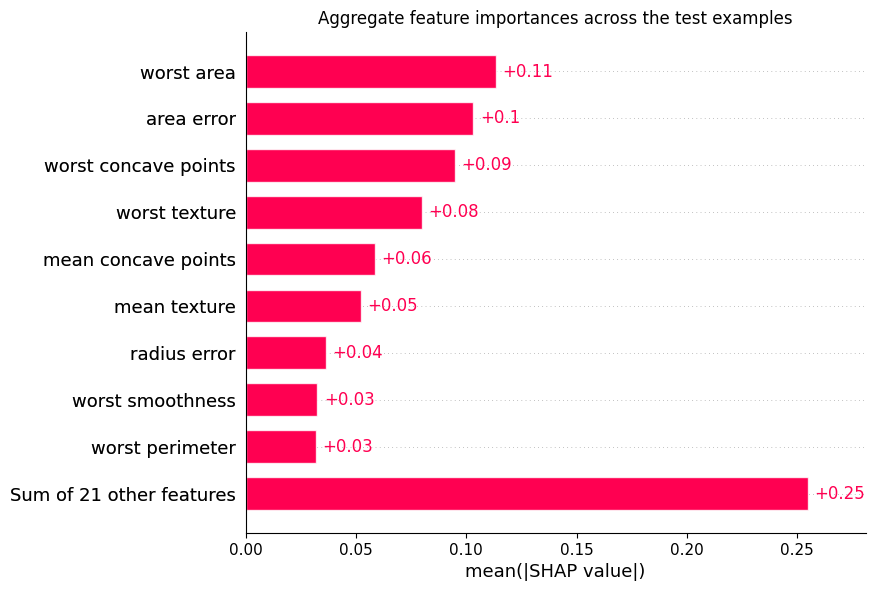

/usr/local/lib/python3.11/dist-packages/tabpfn_extensions/interpretability/shap.py:134: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values=shap_values, show=False)


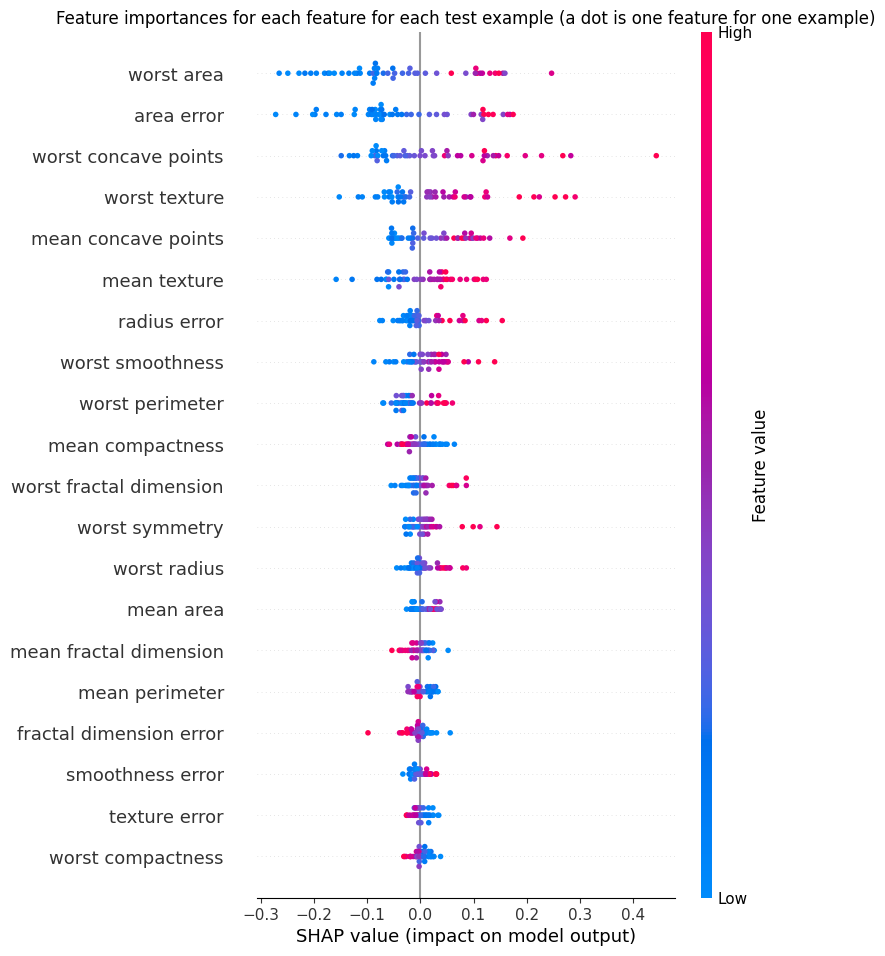

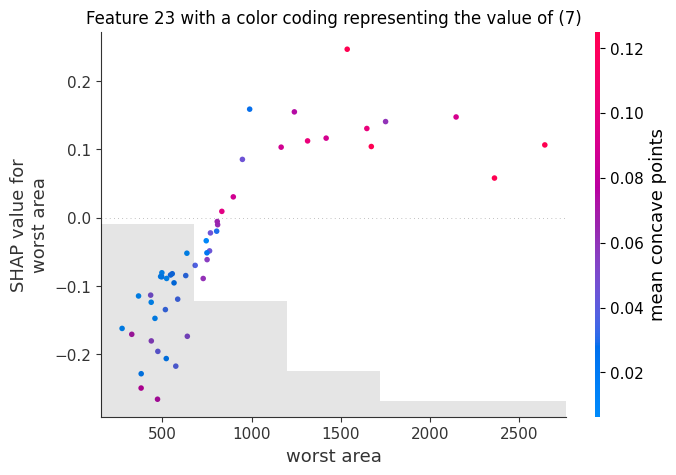

In [19]:
from tabpfn_extensions import interpretability

# Load example dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
n_samples = 50

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5
)

# Initialize and train model
clf = TabPFNClassifier()
clf.fit(X_train, y_train)

# Calculate SHAP values
shap_values = interpretability.shap.get_shap_values(
    estimator=clf,
    test_x=X_test[:n_samples],
    attribute_names=feature_names,
    algorithm="permutation",
)

# Create visualization
fig = interpretability.shap.plot_shap(shap_values)

### **Feature Selection**

In [20]:
from tabpfn_extensions import interpretability

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Initialize model
clf = TabPFNClassifier(n_estimators=1)

# Feature selection
sfs = interpretability.feature_selection.feature_selection(
    estimator=clf,
    X=X,
    y=y,
    n_features_to_select=2,
    feature_names=feature_names
)

# Print selected features
selected_features = [feature_names[i] for i in range(len(feature_names)) if sfs.get_support()[i]]
print("\nSelected features:")
for feature in selected_features:
    print(f"- {feature}")


Selected features:
- worst perimeter
- worst smoothness


## **Predictive Behavior of TabPFN**

### **Decision Boundary during Classification**

In [21]:
# Toy functions that generate the data
def generate_circle(n_datapoints, radius, noise_factor):
    angles = np.linspace(0, 2*np.pi, n_datapoints).T
    x = radius * np.cos(angles) + np.random.randn(n_datapoints) * noise_factor
    y = radius * np.sin(angles) + np.random.randn(n_datapoints) * noise_factor

    return np.stack([x, y]).T

def generate_concentric_cirlces(radii, num_points_per_circle, noise_factor=1/15):
    circles = []
    for r, num_points in zip(radii, num_points_per_circle):
        circles.append(generate_circle(num_points, r, noise_factor))

    circle = np.vstack(circles)
    return circle

def generate_circle_data(num_points_per_circle, radii, noise_factor):
    radii = np.array(radii)
    circles_1 = generate_concentric_cirlces(radii, num_points_per_circle, noise_factor)
    circles_1 = np.hstack([circles_1, np.zeros((sum(num_points_per_circle) , 1))])

    circles_2 = generate_concentric_cirlces(radii + 0.3, num_points_per_circle, noise_factor)
    circles_2 = np.hstack([circles_2, np.ones((sum(num_points_per_circle), 1))])

    circles = np.vstack([circles_1, circles_2])
    X, y = circles[:, :2], circles[:, 2]
    return X, y

# Generate the data
X_train, y_train = generate_circle_data(
  num_points_per_circle=[50, 100, 200],
  radii=[1,2,4],
  noise_factor=0.1
)

# Function for plotting
def plot_decision_boundary(ax, model, model_name):
    cmap = ListedColormap(["#FF0000", "#0000FF"])
    ax.set_title(model_name)
    DecisionBoundaryDisplay.from_estimator(
        model, X_train[:, :2], alpha=0.6, ax=ax, eps=0.2, grid_resolution=50, response_method="predict_proba", cmap=plt.cm.RdBu,
    )
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train > 0, cmap=cmap)

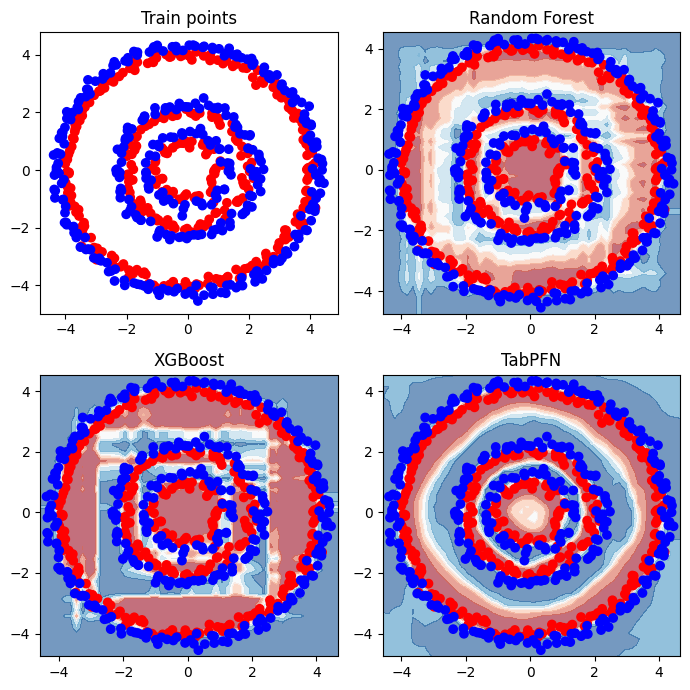

In [22]:
rf = RandomForestClassifier().fit(X_train[:, :2], y_train)
xgb = XGBClassifier().fit(X_train[:, :2], y_train)
tabpfn = TabPFNClassifier().fit(X_train[:, :2], y_train)

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(7,7))

# Plot Train Points
ax_points = axes[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(["#FF0000", "#0000FF"]))

# Plot Random Forest
ax_rf = axes[0, 1]
plot_decision_boundary(ax_rf, rf, "Random Forest")

# Plot XGBoost
ax_xgb = axes[1, 0]
plot_decision_boundary(ax_xgb, xgb, "XGBoost")

# Plot TabPFN
ax_tabpfn = axes[1, 1]
plot_decision_boundary(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **Sin Curve Fitting with Regression**

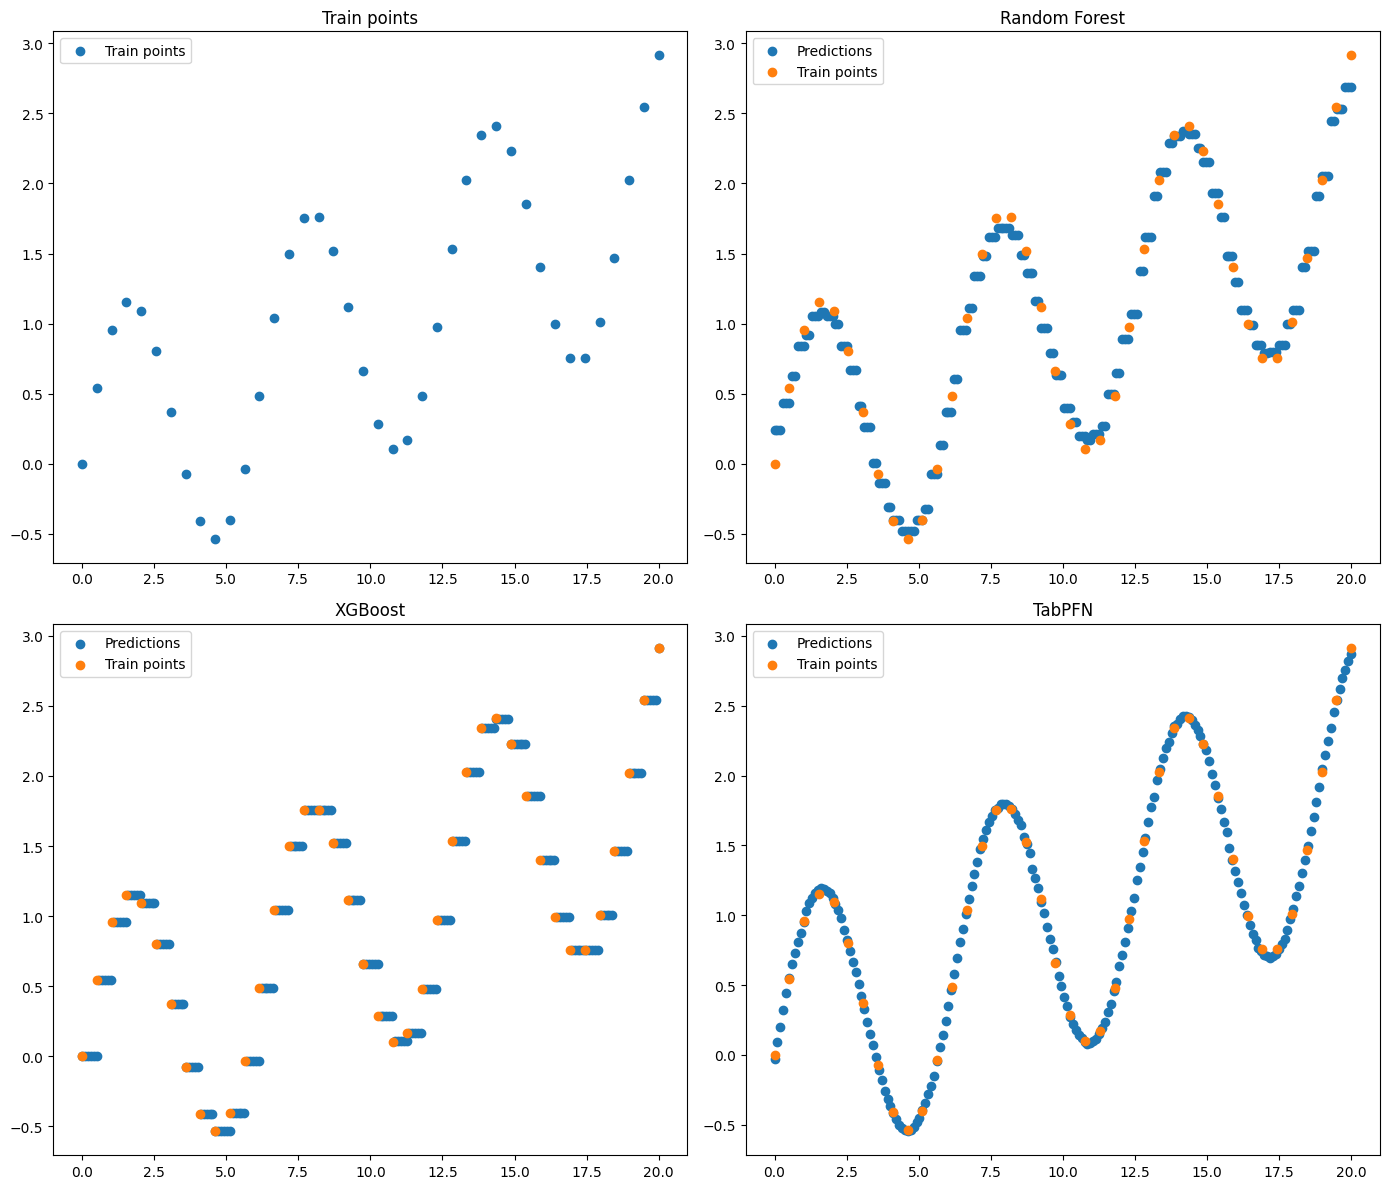

In [23]:
# Toy function to generate data
def generate_sinx_plus_x(N):
    x = np.linspace(0, 20, N)
    y = np.sin(x) + x/10

    return x.reshape(-1, 1), y

# Utility function for plotting
def plot_predictions(ax, model, model_name):
    X_test = np.linspace(0, 20, 200).reshape(-1, 1) # Predict for 200 points  between 0 and 20
    y_preds = model.predict(X_test)
    ax.set_title(model_name)
    ax.scatter(X_test, y_preds, label="Predictions")
    ax.scatter(X_train, y_train, label="Train points")
    ax.legend()

# Generate data
X_train, y_train = generate_sinx_plus_x(N=40)

# Fit Models
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)
xgb = XGBRegressor(random_state=42).fit(X_train, y_train)
tabpfn = TabPFNRegressor()
tabpfn.fit(X_train, y_train)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Plot train points
ax_points = axs[0, 0]
ax_points.set_title("Train points")
ax_points.scatter(X_train, y_train, label="Train points")
ax_points.legend()

# Plot predictions for Random Forest
ax_rf = axs[0, 1]
plot_predictions(ax_rf, rf, "Random Forest")

# Plot predictions for XGBoost
ax_xgb = axs[1, 0]
plot_predictions(ax_xgb, xgb, "XGBoost")

# Plot predictions for TabPFN
ax_tabpfn = axs[1, 1]
plot_predictions(ax_tabpfn, tabpfn, "TabPFN")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### **Uncertainty of TabPFN / Quantile Regresison**

In [24]:
### Code to generate the plot (feel free to ignore)
def plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, full_preds, color_multiplier=5):
  all_quantiles = preds[f"quantiles"]
  y = np.array(all_quantiles) # shape of y: (9, number of samples)

  # Calculate the maximum and minimum values in y
  y_max = np.max(y, axis=0)
  y_min = np.min(y, axis=0)

  # Calculate the widths of each quantile bin
  quantile_bin_widths = np.diff(y, axis=0) # shape of quantile_bin_widths: (8, number of samples)

  # Normalize the bin widths for a given x
  per_x_normalized_bin_widths = (quantile_bin_widths) / (y_max - y_min)

  # Plotting
  num_bins, num_data_points = per_x_normalized_bin_widths.shape[0], per_x_normalized_bin_widths.shape[1]
  rect_width = (x_test[1] - x_test[0]).squeeze() # assuming the x query points are equally spaced out

  for i in range(num_data_points):
      for j in range(num_bins):
          rect_height = quantile_bin_widths[j, i]
          rect = plt.Rectangle(
                    xy=(x_test[i][0] - rect_width / 2, y[j, i]),
                    width=rect_width,
                    height=quantile_bin_widths[j, i],
                    facecolor=plt.cm.viridis(per_x_normalized_bin_widths[j, i] * color_multiplier),
                    edgecolor='none'
                )
          ax.add_patch(rect)

  # Set limits and labels
  ax.plot(x, y_line, label='True line', color='blue')
  ax.set_xlim(min(x_test) - 1, max(x_test) + 1)
  ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
  ax.set_xlabel('X')
  ax.set_ylabel('Y')

  # ax.plot(x, y, label='True line', color='blue')
  ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)

  plt.title('TabPFN Regression Uncertainty')
  plt.show()

# Generate Data
def generate_line_with_heteroscedastic_noise(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    x = np.linspace(x_start, x_end, num_points)
    noise = np.random.randn(num_points)
    y = m * x
    y_noisy = y + (noise * noise_factor * x)

    return x.reshape(-1, 1), y, y_noisy

def generate_line_with_heteroscedastic_noise_with_gap(m=0.8, num_points=200, x_start=0, x_end=100, noise_factor=0.1):
    extra_points = num_points // 3
    x, y, y_noisy = generate_line_with_heteroscedastic_noise(m, num_points+extra_points, x_start, x_end, noise_factor)
    a = np.arange(num_points + extra_points)
    idx = np.where((a < num_points/3) | (a > num_points/3 + extra_points))
    return x[idx], y[idx], y_noisy[idx]

x, y_line, y_noisy = generate_line_with_heteroscedastic_noise_with_gap(0.8)
x_test = np.linspace(0, 100, 200).reshape(-1, 1)

In [25]:
reg = TabPFNRegressor()
reg.fit(x, y_noisy)
preds = reg.predict(x_test, output_type="full")

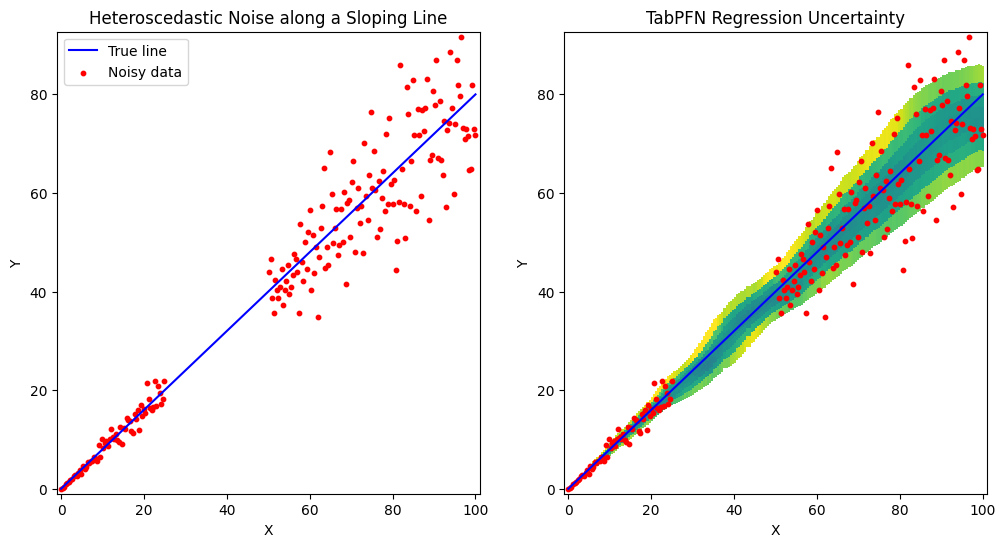

In [26]:
fig = plt.figure(figsize=(12,6))

# Plot the original data
ax = fig.add_subplot(121)
ax.plot(x, y_line, label='True line', color='blue')
ax.scatter(x, y_noisy, label='Noisy data', color='red', s=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(min(x) - 1, max(x) + 1)
ax.set_ylim(np.min(y_noisy) - 1, np.max(y_noisy) + 1)
ax.set_title('Heteroscedastic Noise along a Sloping Line')
ax.legend()

# plot the uncertainty estimates obtained from TabPFN
ax = fig.add_subplot(122)
plot_regression_uncertainty(ax, x, y_line, y_noisy, x_test, preds, color_multiplier=5)